In [1]:
import joblib as jl
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.animation as animation
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib import cm
import matplotlib.gridspec as gridspec

from IPython.display import HTML
from collections import deque


from scipy.interpolate import make_interp_spline, BSpline

In [ ]:
! mkdir allen_movie_frames

In [62]:
data=pd.read_hdf('../data/SupplVideo2.h5')
decoding = data['decoding']
ca_train = decoding['ca_train']
ca_test = decoding['ca_test']
np_train = decoding['np_train']
np_test = decoding['np_test']
ca_decode = decoding['ca_decode']
np_decode = decoding['np_decode']

allen_ex_neural = data['np']
allen_ex_ca = data['ca']
ca_neural = allen_ex_ca['ca_trace'][:80]
np_neural = allen_ex_neural['np_data']


movie = jl.load('../data/movie1_frames.jl')['frames']

spl_ca = make_interp_spline(np.arange(900), ca_test[:,:3], k=3)
ca_test_smooth = spl_ca(np.arange(900))

spl_np = make_interp_spline(np.arange(3600), np_test[:,:3],k=3)
np_test_smooth = spl_np(np.arange(3600))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0


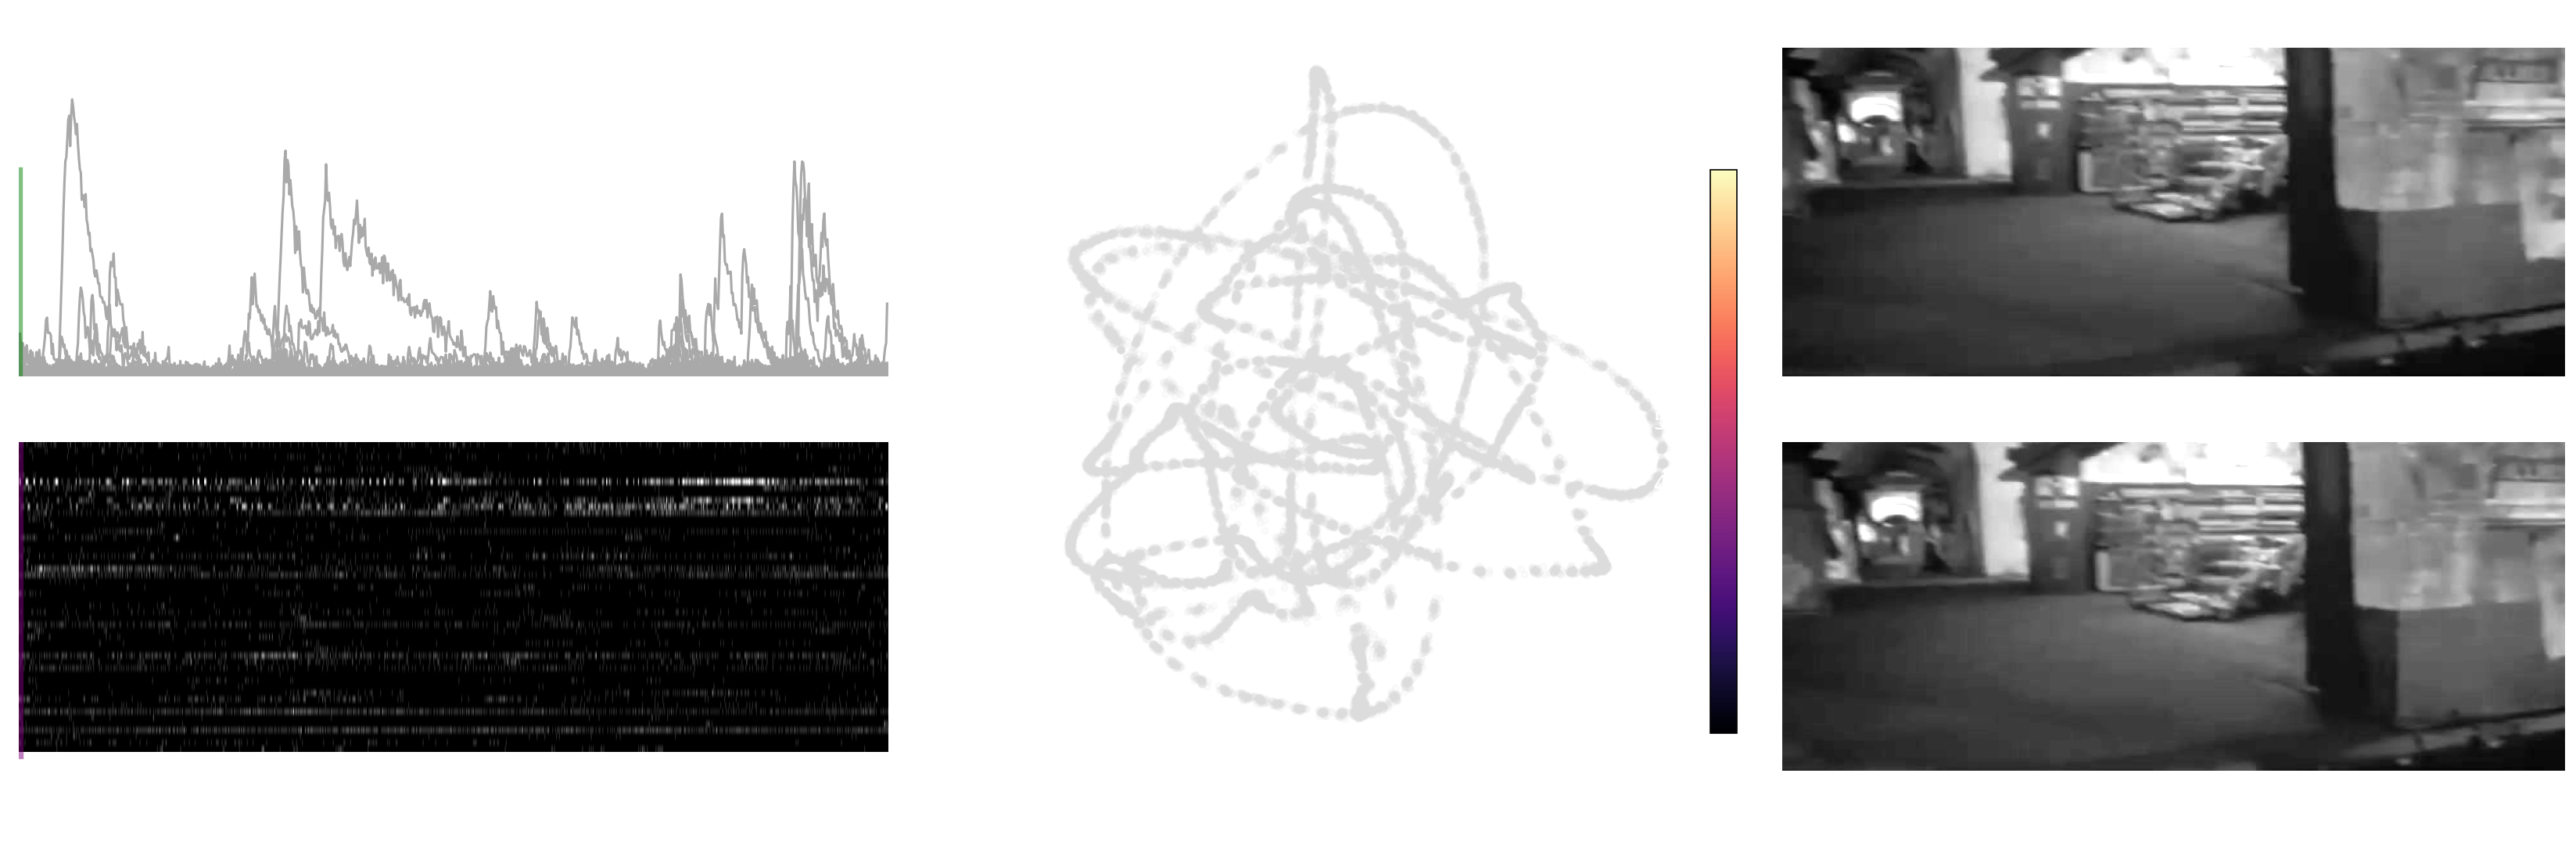

In [36]:
start_idx = 0
length = 900
history_len = 200

def make_white(ax):
    ax.spines['left'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    
fig = plt.figure(figsize=(28, 8), dpi=150)


plt.subplots_adjust(wspace=0.015)

G = gridspec.GridSpec(2,3, width_ratios=[1,1,0.9])

ax1_ca = fig.add_subplot(G[0, 0:1], xlim=(0,length+start_idx))
ax1_np = fig.add_subplot(G[1, 0:1], )
ax2 = fig.add_subplot(G[:, 1], projection = '3d')
ax2_ca = fig.add_subplot(G[0, 2:])
ax2_np = fig.add_subplot(G[1, 2:])

for t in ca_neural:
    ax1_ca.plot(t, c = 'darkgray')
    
ax1_np.imshow(np_neural.T.reshape(1000, 900, -1).mean(axis=-1)[:50,:], aspect='auto', cmap ='gray', vmin=0, vmax=1.5)

ax1_ca.spines['right'].set_visible(False)
ax1_ca.spines['top'].set_visible(False)
ax1_ca.spines['left'].set_visible(False)
ax1_ca.spines['bottom'].set_visible(False)
ax1_ca.set_ylim([0,4])
ax1_ca.axis('off')


ax1_ca.text(750,4,'2-Photon', fontsize=20, color = 'white')


ax1_np.spines['right'].set_visible(False)
ax1_np.spines['top'].set_visible(False)
ax1_np.spines['left'].set_visible(False)
ax1_np.spines['bottom'].set_visible(False)
ax1_np.set_yticks([])
ax1_np.set_xticks(np.linspace(0,899,4), np.linspace(0,30,4, dtype =int), fontsize=15)
ax1_np.set_xlabel('Time (s)', fontsize=20, color = 'white')
ax1_np.text(700,-5,'Neuropixels', fontsize=20, color = 'white')


make_white(ax1_ca)
make_white(ax1_np)

cmap_gray = plt.cm.gray
cmap_magma = plt.cm.magma
cmap_viridis = plt.cm.viridis

z_list_ca = np.tile(np.arange(900),9)
z_list_ca_test = np.arange(900)
z_list_np = np.tile(np.repeat(np.arange(900),4),9)
z_list_np_test = np.repeat(np.arange(900),4)

colors_gray_dim = cmap_gray(z_list_np / z_list_np.max())
colors_ca_test = cmap_viridis(z_list_ca_test/z_list_ca_test.max())
colors_np_test = cmap_magma(z_list_np_test/z_list_np_test.max())
colors_gray_dim[:,-1] = np.tile(np.ones(3600),9)/10



idx1, idx2, idx3 = (0,1,2)

emb=ax2.scatter(np_train[:,idx1], np_train[:,idx2], np_train[:,idx3],  c = colors_gray_dim[-500], s=15, depthshade = False)

test_scat_np = ax2.scatter([],[],[], s=1, c = [], cmap = 'magma', vmax = 3600, vmin=0)
test_scat_ca = ax2.scatter([],[],[], s=1, c = [], cmap = 'viridis', vmax=900, vmin=0)


norm = mpl.colors.Normalize(vmin=0, vmax=900)
cb_ax = fig.add_axes([0.64, 0.15, 0.008, 0.6]) 
cb = mpl.colorbar.ColorbarBase(cb_ax, cmap=cm.magma,
                                norm=norm)
cb.ax.set_title('Frame', fontsize=20, loc = 'center', y=-0.1, color = 'white')
cb.ax.yaxis.set_ticks_position('left')
cb.ax.tick_params(labelsize=15)
cb.ax.tick_params(colors = 'white')


ax2.set_title('CEBRA', fontsize=20, color = 'white')
ax2.set_xlim([-0.13,0.13])
ax2.set_ylim([-0.08,0.13])
ax2.set_zlim([-0.13,0.13])


movie_ca = ax2_ca.imshow(movie[start_idx], aspect='auto', cmap = 'gray')
movie_np = ax2_np.imshow(movie[np_decode[start_idx*4]], aspect = 'auto', cmap = 'gray')

ax2_ca.spines['right'].set_visible(False)
ax2_ca.spines['top'].set_visible(False)
ax2_ca.spines['left'].set_visible(False)
ax2_ca.spines['bottom'].set_visible(False)
ax2_ca.text(280,-10,'True Video', fontsize=20, color = 'white')
ax2_ca.axis('off')
ax2_np.spines['right'].set_visible(False)
ax2_np.spines['top'].set_visible(False)
ax2_np.spines['left'].set_visible(False)
ax2_np.spines['bottom'].set_visible(False)
ax2_np.text(250,-15,'Predicted Video', fontsize=20, color = 'white')
ax2_np.axis('off')

ca_neural_pointer, = ax1_ca.plot([0,0],[0,3.5], linewidth = 5, c = 'green', alpha = 0.5)
np_neural_pointer, = ax1_np.plot([0,0],[0,50], linewidth = 5, c = 'purple', alpha = 0.5)





ax2.axis('off')





def animate_position(i):
    rate = 1
    frame_step = 5
    frame_ratio = 4

    start_idx = 0
    """
    ## For Ca trace
    ca_points = ca_test_smooth[start_idx:start_idx+i*rate,:3][np.arange(0, i*rate, frame_step)].reshape(-1, 1, 3)
    ca_seg = np.concatenate([ca_points[:-1], ca_points[1:]], axis=1)
    ca_coll = Line3DCollection(ca_seg, colors = colors_ca_test[start_idx:(start_idx+i*rate)][np.arange(0, i*rate, frame_step)], linewidth = 3)
    ax2.add_collection(ca_coll)
    """
    
    ## For NP trace
    np_points = np_test_smooth[start_idx*frame_ratio:(start_idx+i*rate)*frame_ratio,:3][np.arange(0, i*rate*frame_ratio, frame_step)].reshape(-1, 1, 3)
    np_seg = np.concatenate([np_points[:-1], np_points[1:]], axis=1)
    np_coll = Line3DCollection(np_seg, colors = colors_np_test[start_idx*frame_ratio:(start_idx+i*rate)*frame_ratio][np.arange(0, i*rate*frame_ratio, frame_step)], linewidth = 3)
    ax2.add_collection(np_coll)

    ca_neural_pointer.set_data([i*rate+start_idx,i*rate+start_idx], [0,2.5])
    np_neural_pointer.set_data([i*rate+start_idx,i*rate+start_idx], [0,50])
     
    
    movie_ca.set_data(movie[i*rate+start_idx])
    movie_np.set_data(movie[np_decode[(i*rate+start_idx)*frame_ratio]])
    
    ## Set the folder you want to save ###
    
    fig.savefig(f'./allen_movie_frames//{i:03d}.png', transparent = True)
    print(i)
    plt.show()


ani = animation.FuncAnimation(
    fig, animate_position, 900, interval=50)


